In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Syntax of np.linspace
#### numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

* Return evenly spaced numbers over a specified interval.

* Returns num evenly spaced samples, calculated over the interval [start, stop].

* The endpoint of the interval can optionally be excluded.

Source: <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html">Click here</a>, for original documentation.

In [2]:
x = np.linspace(start=0, stop=10*np.pi, num=100)
y = np.sin(x)

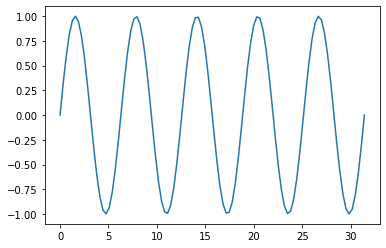

In [3]:
plt.plot(x, y)
plt.show()

# Getting Dataset

### Part 1: Using wget

In [4]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/datasets/Arrhythmia
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2019-12-21 19:33:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K   174KB/s    in 2.3s    

2019-12-21 19:34:02 (174 KB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [5]:
# list files in current directory
!ls

01Introduction.ipynb  arrhythmia.data


In [6]:
# check if the data has a header
# !head arrhythmia.data

In [7]:
# Check the data
df = pd.read_csv('arrhythmia.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [8]:
# since the data has many columns, take just the first few and name them (as per the docs)
data = df[[0,1,2,3,4,5]]
data.columns=['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']

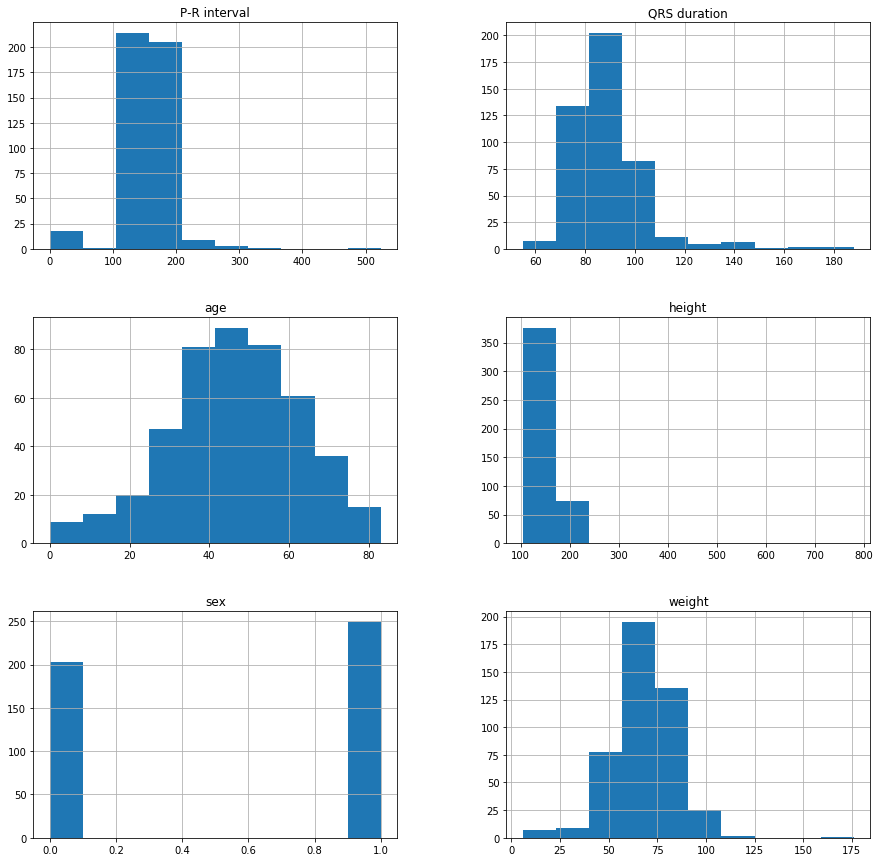

In [10]:
plt.rcParams['figure.figsize'] = [15, 15] # make the plot bigger
data.hist(); # use a semicolor to suppress return value

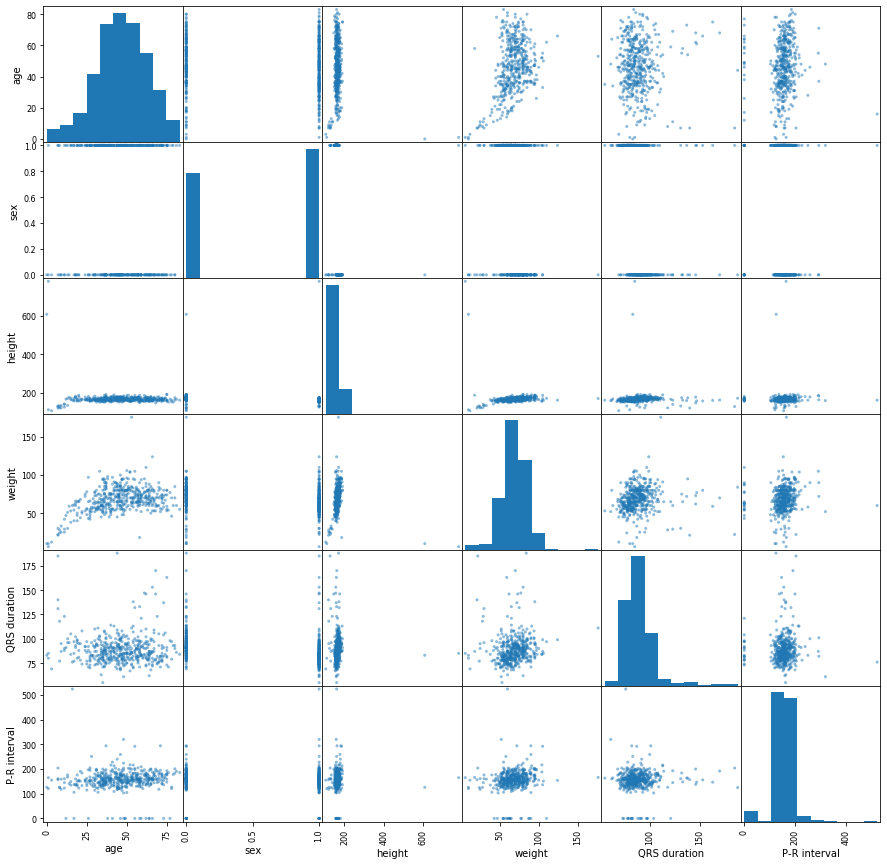

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);
# This function does a scatter plot between each feature and every other feature.
# And, along the diagonal it plots the histogram as above of each feature.

### Part 2: Using tf.keras

In [12]:
# use keras get_file to download the auto MPG dataset
# Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [13]:
tf.keras.utils.get_file(fname='auto-mpg.data', origin=url)

NameError: name 'tf' is not defined

In [14]:
!head /home/ashish/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [15]:
# the default path for the data is /home/ashish/.keras/datasets/
# Since the data is not csv and is seperated with whitespace so we need to delimit it.
df = pd.read_csv('/home/ashish/.keras/datasets/auto-mpg.data', 
                 header=None, 
                 delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Part 3: Upload the file Yourself

In [ ]:
# another method: upload your own file
from google.colab import files
uploaded_file = files.upload()

In [ ]:
# open the file
# the last few lines are junk
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', error_bad_lines=False)
df.head()

### Part 4: Access files from Google Drive

In [ ]:
# access files from google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Check current directory - now gdrive is there
# what's in gdrive?
!ls gdrive